<a href="https://colab.research.google.com/github/RazvanPorojan/metal_python/blob/master/Keras_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot

In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import json
from livelossplot import PlotLossesKeras


Using TensorFlow backend.


Example

In [0]:
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

labels = array([1,1,1,1,1,0,0,0,0,0])

In [0]:
def parseJson(json_file):
  f = open(json_file,)
  data = json.load(f)
  solr_docs = []
  solr_labels = []

  i = 0
  j = 0
  for doc in data['response']['docs']:
      if not('industry' in doc):
        print("Missing industry in {0}".format((i)))
        print(doc['text'][1])
        solr_labels.append(0)
      else:
          if(doc['industry']=='Information Technology and Services'): #or doc['industry']=='Computer Software'):
            solr_labels.append(1)
            j += 1
          else:
            solr_labels.append(0)    
      i += 1
      #use different fields as data: text, skill, industry etc. title = text[1]
      #solr_docs.append(' '.join(doc['text']))
      #solr_docs.append(doc['text'][1]) #title
      solr_docs.append(doc['title']) #title
  print(solr_docs[0:10])
  print("{0} positive labels".format(j))
  train = {}
  train['docs'] = solr_docs
  train['labels'] = solr_labels
  return train

Selective Data

In [45]:
solr_docs = []
solr_labels = []

filename = 'drive/My Drive/_SOLR_EXPORT_JSON/it540.json'
train_data = parseJson(filename)
solr_docs.extend(train_data['docs'])
solr_labels.extend(train_data['labels'])

filename = 'drive/My Drive/_SOLR_EXPORT_JSON/staff540.json'
train_data = parseJson(filename)
solr_docs.extend(train_data['docs'])
solr_labels.extend(train_data['labels'])


['Software Developer at Star Storage', 'J2EE Analyst at Deutsche Bank Global en GFT', 'IT Solutions Architect Freelance in BBVA', 'Gestión de proyectos con SILK, LaCaixa. at VILT', 'Arquitecta aplicaciones web - VASS', 'Analista Programador en Grupo Tragsa', 'EMC Documentum Senior Consultant en STRATESYS', 'Analista Programador en Sopra Group', 'IT Manager B2B Business (Grupo EVO Banco)', 'Team Leader en everis']
540 positive labels
['Consultant (Travel Technology &amp; eCommerce Division)', 'Recruitment Consultant at PDM Consultancy', 'Senior Consultant at System Recruitment Specialists', 'Director Global Talent Acquisition at CRF Health', 'Client Relationship Manager, Talent Acquisition EMEA at McGraw Hill Financial', 'Managing Director at PDM Recruitment Consultancy', 'Global SAP Contract Recruitment Specialist at Modis', 'CJS Solutions', 'Recruitment Consultant - Capital Markets', 'Recruitment Consultant at The International Recruitment Group']
0 positive labels


Full Data

In [0]:
#init
#batches = 80
batches = 1

rows = 500

start = 0
solr_docs = []
solr_labels = []


for k in range(batches):
  start += rows
  filename = 'drive/My Drive/_SOLR_EXPORT_JSON/solr_{0}.json'.format(start)
  print(filename)  
  train_data = parseJson(filename)
  solr_docs.append(train_data['docs'])
  solr_labels.append(train_data['labels'])

Get Vocabulary

In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(solr_docs) 
num_words = len(tokenizer.word_index) + 1
print(num_words)

1602


In [48]:
# integer encode the documents
vocab_size = num_words
encoded_docs = [one_hot(d, vocab_size) for d in solr_docs]
padded_docs = pad_sequences(encoded_docs, padding='post')
print(padded_docs[0:10])

[[ 563 1074  364 1367  634    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [1012 1194  364  893 1309 1472  279 1037    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 801 1170 1086 1088 1335  117    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [1513 1015 1495 1480  413 1164  364 1235    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 246  279  299  740    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [1382   73  279  710 1223    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0

In [55]:
# define the model simple one
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=32)) #5327
model.add(Flatten())

model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 50)            80100     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 8005      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 88,111
Trainable params: 88,111
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=32))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

ValueError: ignored

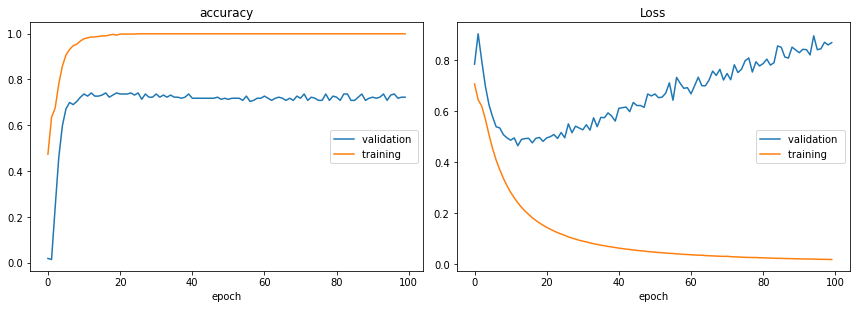

accuracy
	validation       	 (min:    0.009, max:    0.755, cur:    0.722)
	training         	 (min:    0.473, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.464, max:    2.140, cur:    0.867)
	training         	 (min:    0.004, max:    0.706, cur:    0.018)


In [56]:
# fit the model
model.fit(padded_docs, solr_labels, shuffle=True, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [48]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: {0} Loss: {1}'.format((accuracy*100), loss))

Accuracy: 100.0 Loss: 0.6346268653869629


In [0]:
model.save('drive/My Drive/_SOLR_EXPORT_JSON/skill_embedding_model.h5')

TODO: Now we can check the embeddings for some skills. 

* How can we evaluate the embeddings? (not for all vocabulary but for skills).
* How are these embeddings different if we train different (different data, different labels)? Autoencoder?
* Can we add a metric about embedding during training?
* Are the labels balanced?



